<a href="https://colab.research.google.com/github/Rafaacv/learningPython/blob/master/unsupervised_capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
%matplotlib inline
from sklearn import preprocessing
from sklearn import metrics
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans,DBSCAN
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, KFold, StratifiedKFold
from datetime import datetime,date
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import adjusted_rand_score
import scipy

**Did the student find a dataset suitable for an unsupervised learning research question (1 point)?**


[CREDIT CARD FRAUD DETECTION DATA SET LINK](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data)


[SLIDE DECK LINK](https://docs.google.com/presentation/d/1glEYmRRFxWOCLiIartM0-itgKS6f43gGejjcqHval3Y/edit?usp=sharing)

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/creditcard.csv')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Content**


The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
<br><br>



It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Did the student clean the data (2 points)?<br>
Did the student explore the data and choose the features that will be used in the models (2 points)?

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

No nulls!

In [ ]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df)*100,2), '% of the dataset')
print('Fraud', round(df['Class'].value_counts()[1]/len(df)*100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Fraud 0.17 % of the dataset


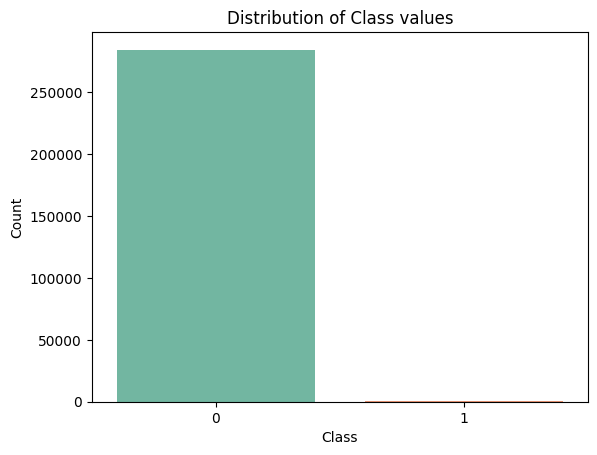

In [ ]:
sns.countplot(x='Class', data=df, palette='Set2')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Class values')
plt.show()

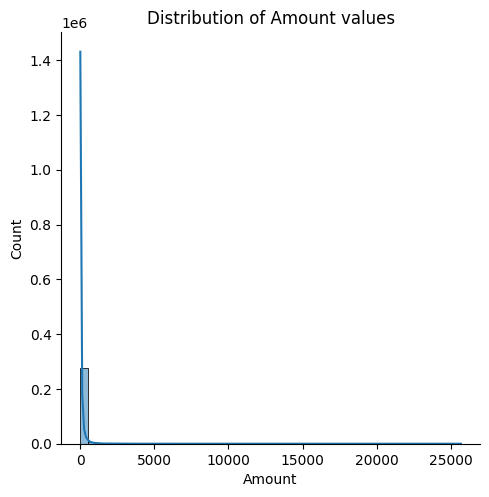

In [ ]:
sns.displot(df['Amount'], bins=50, kde=True)
plt.xlabel('Amount')
plt.title('Distribution of Amount values')
plt.show()

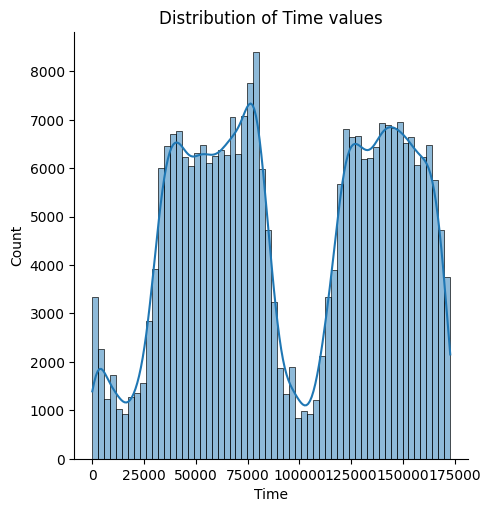

In [ ]:
sns.displot(df['Time'], bins=60, kde=True)
plt.xlabel('Time')
plt.title('Distribution of Time values')
plt.show()

The data is highly unbalanced with only 0.17% of the data being fraud. <br><br>
I'll subsample creating a new data where Fraud (1) and Not Fraud (0) are at a 50/50 rate.
<br>
I'll also scale Amount and Time

In [ ]:
#robust scaler is less prone to outliers
df['scaled_amount'] = RobustScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = RobustScaler().fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)



In [ ]:
time=df['scaled_time']
amount=df['scaled_amount']

In [ ]:
#the columns were reinsterd in order to keep similar data next to each other. This could have positive impact while modeling.

df.insert(0, 'amount', amount)

df.insert(1, 'time', time)


df.drop(['scaled_amount','scaled_time'], axis=1, inplace=True)

# Amount and Time are Scaled!

df.head()

,amount,time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [ ]:
#separate majority and minority classes
df_majority=df[df.Class==0]
df_minority=df[df.Class==1]

In [ ]:
#undersample majority class
fraud_df=df_majority.sample(len(df_minority))

In [ ]:
#combine both distributions
df_normal=pd.concat([fraud_df, df_minority])

In [ ]:
#shuffle the data set
df_normal=df_normal.sample(frac=1).reset_index(drop=True)

print(df_normal.Class.value_counts())

0    492
1    492
Name: Class, dtype: int64


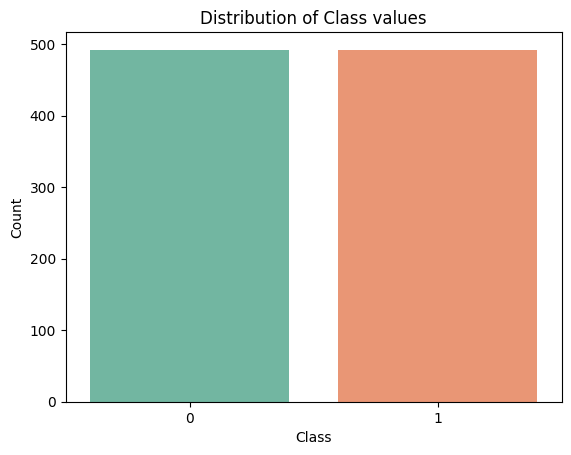

In [ ]:
sns.countplot(x='Class', data=df_normal, palette='Set2')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Class values')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

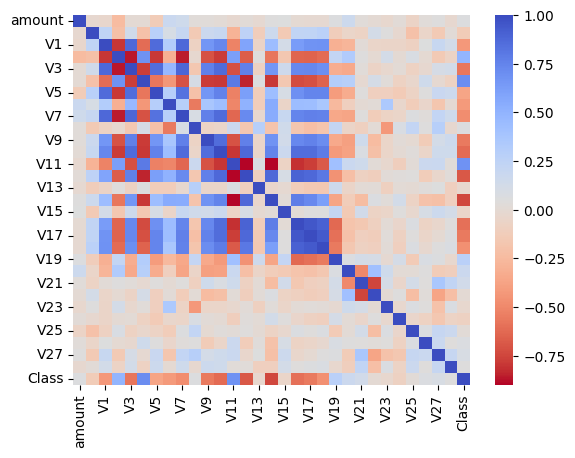

In [ ]:
corr=df_normal.corr()
sns.heatmap(corr, cmap='coolwarm_r')
plt.show

I'll remove outliers using IQR. This really improves the model.

In [ ]:
from scipy.stats import norm

# # -----> V14 Removing Outliers (Highest Negative Correlated with Labels)
v14_fraud = df_normal['V14'].loc[df_normal['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

df_normal = df_normal.drop(df_normal[(df_normal['V14'] > v14_upper) | (df_normal['V14'] < v14_lower)].index)
print('----' * 44)

# -----> V12 removing outliers from fraud transactions
v12_fraud = df_normal['V12'].loc[df_normal['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
df_normal = df_normal.drop(df_normal[(df_normal['V12'] > v12_upper) | (df_normal['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(df_normal)))
print('----' * 44)


# Removing outliers V10 Feature
v10_fraud = df_normal['V10'].loc[df_normal['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
df_normal = df_normal.drop(df_normal[(df_normal['V10'] > v10_upper) | (df_normal['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(df_normal)))

Quartile 25: -9.692722964972386 | Quartile 75: -4.282820849486865
iqr: 5.409902115485521
Cut Off: 8.114853173228282
V14 Lower: -17.807576138200666
V14 Upper: 3.8320323237414167
Feature V14 Outliers for Fraud Cases: 4
V10 outliers:[-18.0499976898594, -18.8220867423816, -18.4937733551053, -19.2143254902614]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Lower: -17.3430371579634
V12 Upper: 5.776973384895937
V12 outliers: [-18.4311310279993, -18.6837146333443, -18.5536970096458, -18.0475965708216]
Feature V12 Outliers for Fraud Cases: 4
Number of Instances after outliers removal: 976
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V10 Lower: -14.89885463232024
V10 Upper: 4.92033495834214
V10 outliers: [-24.4031849699728, -15.231833

In [ ]:
X=df_normal.drop('Class', axis=1)
y=df_normal['Class']

Did the student apply at least two unsupervised learning methods (2 points)?

The date seems to be better balanced. I'll proceed with PCA and t-SNE for dimensionality reduction. <br>
Then, I'll use Kmeans and Gaussian mixture to see which one is better.

In [ ]:
#create PCA
X_pca=PCA(n_components=2, random_state=42).fit_transform(df_normal.values)
#create t-SNE
X_tsne=TSNE(n_components=2, random_state=42).fit_transform(df_normal.values)

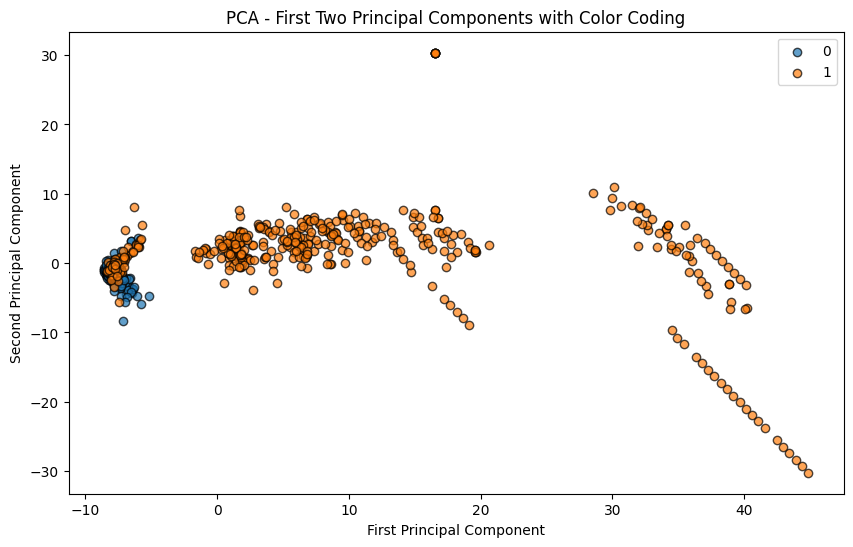

In [ ]:
# Extract the two components to plot
x1 = X_pca[:, 0]
y1 = X_pca[:, 1]

plt.figure(figsize=(10, 6))

# Create scatter plot for each unique label
for label in np.unique(y):
    plt.scatter(x1[y == label], y1[y == label], label=label, edgecolor='k', alpha=0.7)

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA - First Two Principal Components with Color Coding')
plt.legend()
plt.show()

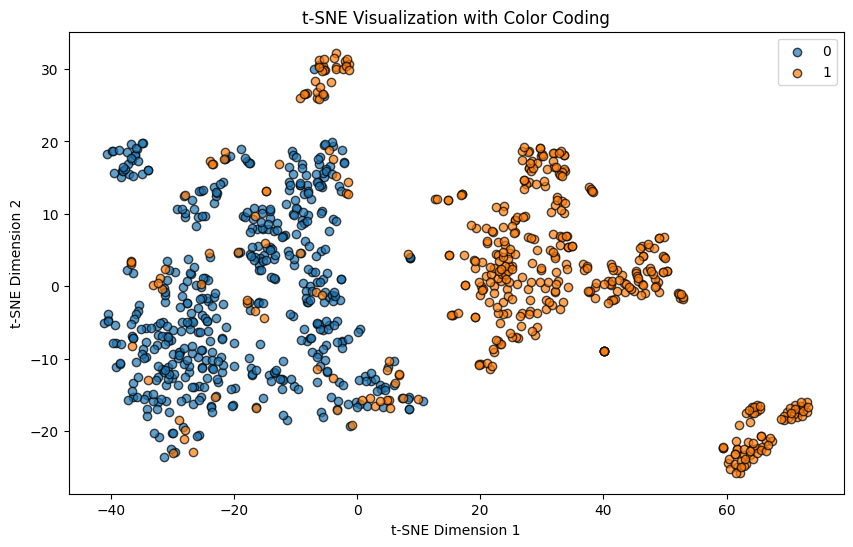

In [ ]:
# Extract the two t-SNE dimensions
x2 = X_tsne[:, 0]
y2 = X_tsne[:, 1]

plt.figure(figsize=(10, 6))

# Create scatter plot for each unique label
for label in np.unique(y):
    plt.scatter(x2[y == label], y2[y == label], label=label, edgecolor='k', alpha=0.7)

plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization with Color Coding')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


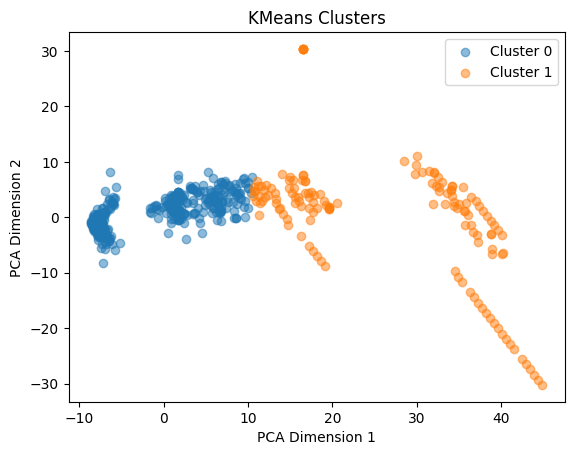

In [ ]:
from sklearn.metrics import silhouette_score
X_pca1=X_pca.copy()
k_means = KMeans(n_clusters=2, random_state=123)
k_means.fit(X_pca1)
y_pred = k_means.predict(X_pca1)

# Scatter plot of clusters
for cluster in np.unique(y_pred):
    plt.scatter(X_pca1[y_pred == cluster, 0], X_pca1[y_pred == cluster, 1], label=f"Cluster {cluster}", alpha=0.5)

plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.title('KMeans Clusters')
plt.legend()
plt.show()



In [ ]:
# Calculate ARI
ari_score = adjusted_rand_score(y, y_pred)
print(f"Adjusted Rand Index (ARI): {ari_score}")


silhouette_avg = silhouette_score(X_pca1, y_pred)

print(f"Silhouette Score: {silhouette_avg:.2f}")




Adjusted Rand Index (ARI): 0.11443951302127087
Silhouette Score: 0.72


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


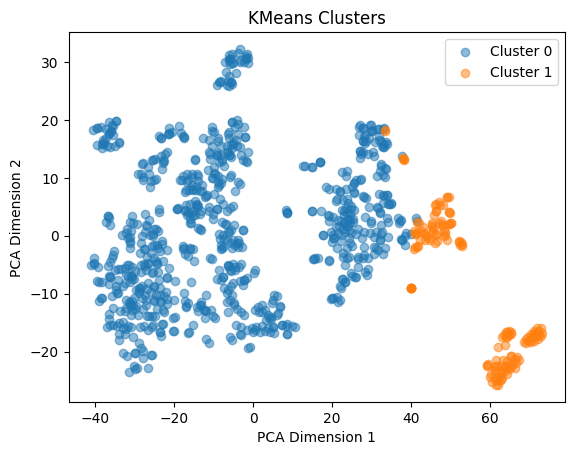

In [ ]:
X_tsne1=X_tsne.copy()
k_means = KMeans(n_clusters=2, random_state=123)
k_means.fit(X_tsne1)
y_pred1 = k_means.predict(X_tsne1)

# Scatter plot of clusters
for cluster in np.unique(y_pred):
    plt.scatter(X_tsne1[y_pred == cluster, 0], X_tsne1[y_pred == cluster, 1], label=f"Cluster {cluster}", alpha=0.5)

plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.title('KMeans Clusters')
plt.legend()
plt.show()

In [ ]:
ari_score = adjusted_rand_score(y, y_pred1)
print(f"Adjusted Rand Index (ARI): {ari_score}")


silhouette_avg = silhouette_score(X_tsne1, y_pred1)

print(f"Silhouette Score: {silhouette_avg:.2f}")

Adjusted Rand Index (ARI): 0.6345436416296941
Silhouette Score: 0.58


In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
X_pca2=X_pca.copy()
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=2, random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(X_pca2)

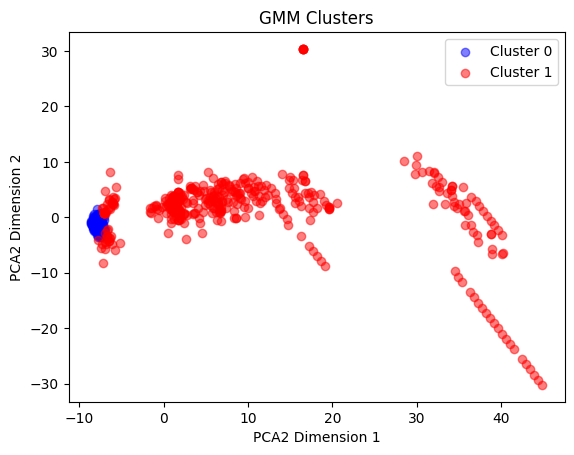

In [ ]:
# Scatter plot of clusters
unique_clusters = np.unique(clusters)
colors = ['blue', 'red']  # Assign a color for each cluster; adjust if more clusters

for cluster, color in zip(unique_clusters, colors):
    plt.scatter(
        X_pca2[clusters == cluster, 0],
        X_pca2[clusters == cluster, 1],
        c=color,
        label=f"Cluster {cluster}",
        alpha=0.5
    )

plt.xlabel('PCA2 Dimension 1')
plt.ylabel('PCA2 Dimension 2')
plt.title('GMM Clusters')
plt.legend()
plt.show()

In [ ]:
# Calculate ARI
ari_score = adjusted_rand_score(y, clusters)
print(f"Adjusted Rand Index (ARI): {ari_score}")

silhouette_avg = silhouette_score(X_pca2, clusters)

print(f"Silhouette Score: {silhouette_avg:.2f}")

Adjusted Rand Index (ARI): 0.6413145780096985
Silhouette Score: 0.55


In [ ]:
# Defining the agglomerative clustering
gmm_cluster2 = GaussianMixture(n_components=2, random_state=123)
X_tsne2=X_tsne.copy()
# Fit model
clusters2 = gmm_cluster2.fit_predict(X_tsne2)

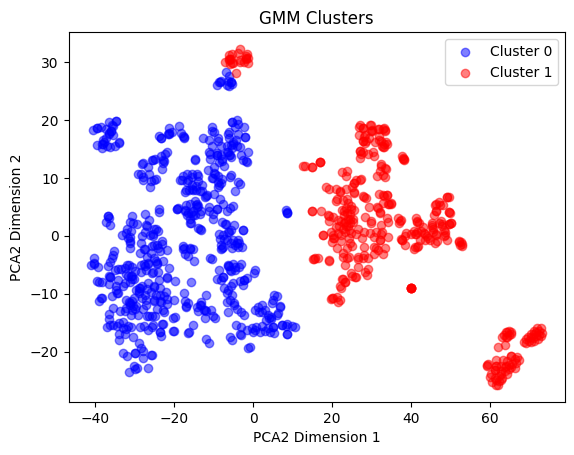

In [ ]:
# Scatter plot of clusters
unique_clusters = np.unique(clusters2)
colors = ['blue', 'red']  # Assign a color for each cluster; adjust if more clusters

for cluster, color in zip(unique_clusters, colors):
    plt.scatter(
        X_tsne2[clusters2 == cluster, 0],
        X_tsne2[clusters2 == cluster, 1],
        c=color,
        label=f"Cluster {cluster}",
        alpha=0.5
    )

plt.xlabel('PCA2 Dimension 1')
plt.ylabel('PCA2 Dimension 2')
plt.title('GMM Clusters')
plt.legend()
plt.show()

In [ ]:
# Calculate ARI
ari_score = adjusted_rand_score(y, clusters2)
print(f"Adjusted Rand Index (ARI): {ari_score}")

ilhouette_avg = silhouette_score(X_tsne2, clusters2)

print(f"Silhouette Score: {silhouette_avg:.2f}")

Adjusted Rand Index (ARI): 0.7074251642898642
Silhouette Score: 0.55


Did the student evaluate the results of the models using proper metrics (2 points)?<br>
Did the student choose the best model according to a logical reasoning (1 point)?

According to visualizations and ARI score, GMM with t-SNE is the best option, with a clear separation between 0 and 1, and a ARI score of .61.

The model could use some improvements to increase the ARI score.